# Энергия ферромагнетика (2D)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать среднюю энергию $\langle E \rangle$ для указанной цепочки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1, 1.1, ..., 5.0]$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Средняя энергия для $L_x=4$ при температурах $kT \in [1, 1.1, ..., 5.0]$:

```
[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]
```


**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
from numba import njit, prange
import time

In [26]:
# дано
Ly = 4
J = 1
Lx = np.arange(2, 9, 1)
kT = np.arange(1, 5.1, 0.1)
kT

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])

In [9]:
@njit
def sred_energy(lx, ly, kt): # функция, подсчитывающая среднюю энергию системы
    '''
    Находит среднюю энергию заданной параметрами системы по всем состояниям.
    (рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам сигм)
    
    Параметры
    ---------
    lx : int 
         Размерность решетки по горизонтали.
    ly : int
         Размерность решетки по вертикали.
    kt : int
         Температура системы, умноженная на константу Больцмана.
    
    Возвращаемое значение
    ---------------------
    Esred : int
            Среднее значение энергии данной системы.
            
    '''
    siz = lx*ly
    Z = 0
    Esred = 0
    sigma = np.ones(siz)
    for i in range(2**(siz)): # перебирает все возможные комбинации сигм
        sigma = sigma_generator(sigma)
        sigma = sigma.reshape(ly, lx)
        E = system_energy(sigma, lx, ly)
        Z += np.exp(-1 / kt * E)
        Esred += E * np.exp(-E/kt)
        sigma = sigma.reshape(siz)

    Esred = Esred / Z / siz # плюс нормируем
    return(Esred)

In [10]:
@njit
def sigma_generator(sigma):
    '''
    Генерирует набор сигм - набор значений всех N спинов (где N = Lx*Ly). 
    
    Работает по принципу двоичных чисел, представляя массив спинов sigma как двоичное число, где '-1' сопоставляется с '1',
    а '1' сопоставляется с '0'. Таким образом, чтобы получить новый набор сигм, функция просто увеличивает это двоичное 
    число на 1.
    
    Параметры
    ---------
    sigma : np.ndarray (одномерный массив длины lx*ly)
            Набор значений спинов, состоящий из '-1' и '1'.
    
    Возвращаемое значение
    ---------------------
    sigma : np.ndarray (одномерный массив длины lx*ly)
            Измененный набор значений спинов, состоящий из '-1' и '1'.

    '''
    for i in prange(len(sigma)):
        if sigma[i] == -1:
            sigma[i] = 1
        else:
            sigma[i] = -1
            break
    return sigma

In [11]:
@njit
def system_energy(sigma, lx, ly): # вычисляет энергию системы при нулевом внешнем магнитном поле
    '''
    Вычисляет энергию системы в одном конкретном состоянии, описываемом матрицей спинов sigma.
    
    Параметры
    ---------
    sigma : np.ndarray (двумерный массив размерности (ly,lx))
            Набор значений спинов, состоящий из '-1' и '1'.
    lx : int 
         Размерность решетки по горизонтали.
    ly : int
         Размерность решетки по вертикали.
    
    Возвращаемое значение
    ---------------------
    E : int
        Значение энергии данной системы в конкретном состоянии sigma.
            
    '''
    E = 0
    for i in prange(ly):
        for j in prange(lx):
            # проверка на края массива
            if (i == ly - 1 and j == lx - 1):
                E -= J * (sigma[i,j] * sigma[0, j] + sigma[i,j] * sigma[i,0])
                continue
            if (i == ly - 1):
                E -= J * (sigma[i,j] * sigma[0, j] + sigma[i,j] * sigma[i, j+1])
                continue
            if (j == lx - 1):
                E -= J * (sigma[i,j] * sigma[i+1, j] + sigma[i,j] * sigma[i, 0])
                continue
            
            E -= J * (sigma[i,j] * sigma[i+1, j] + sigma[i,j] * sigma[i, j+1])
    return(E)

In [12]:
# проверка правильности работы программы при Lx = 4, Ly = 4
test = np.zeros(len(kT))
for i in trange(len(kT)):
    test[i] = sred_energy(4, 4, kT[i])
print(test)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 26.35it/s]

[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889 -0.45613537]


In [13]:
print([-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889] == [-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889])

True


In [8]:
alldata = [] # массив для записи всех результатов

for j in range(len(Lx)):
    start = time.time()
    ans = np.zeros(len(kT))
    for i in trange(len(kT)):
        ans[i] = sred_energy(Lx[j], Ly, kT[i])
    print('Lx =', Lx[j])
    print("Время работы: ", time.time() - start, " секунд")
    print(ans, '\n')
    alldata.append(ans)
    
np.save("all_sred_energies.npy", alldata)

 34%|███████████████████████████▋                                                     | 14/41 [00:00<00:00, 137.63it/s]

Lx = 2
Время работы:  0.5039021968841553  секунд
[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023 -0.64859447] 

Lx = 3
Время работы:  0.025931596755981445  секунд
[-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0.7409381  -0.71162671
 -0.68448222 -0.65930219 -0.635902

  2%|██                                                                                 | 1/41 [00:00<00:04,  8.36it/s]

Lx = 4
Время работы:  0.30716657638549805  секунд
[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889 -0.45613537] 



  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

Lx = 5
Время работы:  5.0468480587005615  секунд
[-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774 -0.44551718] 



  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

Lx = 6
Время работы:  81.90578436851501  секунд
[-1.99715857 -1.99396113 -1.9885651  -1.98015781 -1.96780519 -1.95042956
 -1.92678909 -1.89549406 -1.8551112  -1.80440326 -1.74270304 -1.67032537
 -1.58882722 -1.50092868 -1.41005807 -1.31969261 -1.23276666 -1.15134108
 -1.07656139 -1.00881115 -0.94793988 -0.8934793  -0.84480933 -0.8012682
 -0.76221687 -0.72707144 -0.69531564 -0.66650184 -0.6402464  -0.61622247
 -0.59415234 -0.57380002 -0.55496464 -0.53747479 -0.52118368 -0.50596511
 -0.49171009 -0.47832415 -0.46572503 -0.45384075 -0.44260812] 



  2%|█▉                                                                              | 1/41 [08:56<5:57:32, 536.30s/it]

Lx = 7
Время работы:  1346.3447444438934  секунд
[-1.9971582  -1.99395917 -1.98855692 -1.98012917 -1.96771861 -1.95019835
 -1.92623542 -1.89429394 -1.85274448 -1.80014858 -1.73572886 -1.65989967
 -1.57458935 -1.48308936 -1.38940407 -1.29738702 -1.21005576 -1.1293045
 -1.05597909 -0.99014355 -0.93137801 -0.87902057 -0.83233015 -0.79058107
 -0.75310988 -0.71933295 -0.68874798 -0.66092782 -0.63551132 -0.61219363
 -0.59071721 -0.5708639  -0.55244826 -0.53531194 -0.51931914 -0.50435284
 -0.49031168 -0.47710754 -0.46466335 -0.45291152 -0.44179242] 



100%|███████████████████████████████████████████████████████████████████████████████| 41/41 [6:08:21<00:00, 539.07s/it]

Lx = 8
Время работы:  22101.894439935684  секунд
[-1.99715782 -1.99395721 -1.9885487  -1.98010037 -1.96763138 -1.94996515
 -1.92567737 -1.8930884  -1.8503837  -1.79595524 -1.72897959 -1.65006494
 -1.56159887 -1.46746092 -1.37213467 -1.27966283 -1.19294767 -1.11358152
 -1.0420662  -0.97817672 -0.92129526 -0.87064765 -0.82544474 -0.78495363
 -0.74852627 -0.71560459 -0.68571476 -0.65845691 -0.63349414 -0.61054231
 -0.58936111 -0.56974636 -0.55152389 -0.53454443 -0.51867942 -0.50381755
 -0.48986203 -0.47672839 -0.46434245 -0.45263888 -0.44155997] 



In [3]:
# проверим что все данные нормально запислаись
result = np.load('all_sred_energies.npy')
result

array([[-1.99509474, -1.98967862, -1.98074878, -1.96731117, -1.94851445,
        -1.92375828, -1.89277291, -1.85565639, -1.81286316, -1.76514762,
        -1.71347563, -1.65892227, -1.60257405, -1.5454491 , -1.48844224,
        -1.43229537, -1.3775895 , -1.3247523 , -1.27407538, -1.22573609,
        -1.17982015, -1.13634286, -1.09526756, -1.05652101, -1.02000562,
        -0.98560898, -0.9532109 , -0.92268862, -0.89392045, -0.86678827,
        -0.84117913, -0.8169862 , -0.79410926, -0.77245486, -0.75193626,
        -0.73247322, -0.71399168, -0.69642337, -0.67970548, -0.66378023,
        -0.64859447],
       [-1.99711779, -1.99383665, -1.98825271, -1.97949351, -1.96659182,
        -1.94853206, -1.92432618, -1.89312223, -1.85433583, -1.80777902,
        -1.75375117, -1.69305981, -1.62695673, -1.55700043, -1.48487836,
        -1.41223059, -1.34050963, -1.27089443, -1.20425882, -1.14118312,
        -1.08199278, -1.02680913, -0.97560137, -0.92823315, -0.88450084,
        -0.84416295, -0.80696

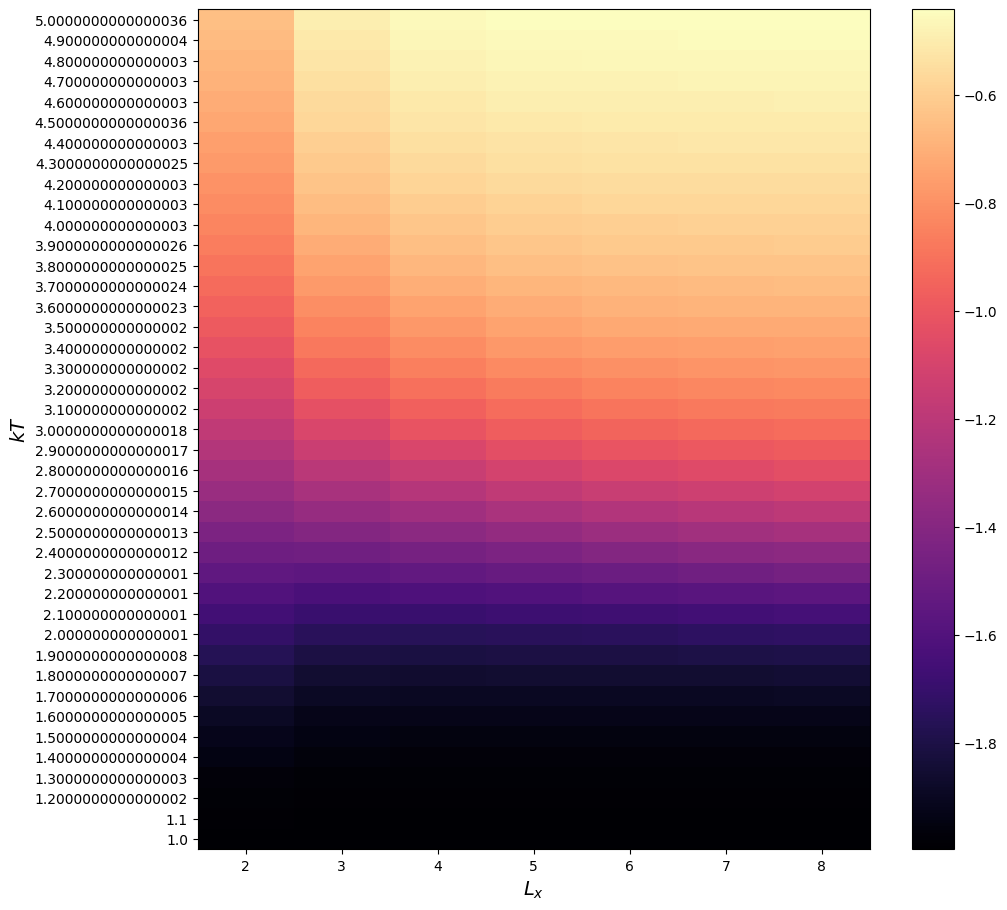

In [28]:
# построение графика
plt.figure(1,(10,10))
plt.pcolormesh(np.transpose(result), cmap='magma');
plt.colorbar();
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.xlabel(r'$L_x$', fontsize=14);
plt.ylabel(r'$kT$', fontsize=14);
plt.xticks(np.arange(len(Lx)) + 0.5, Lx);
plt.yticks(np.arange(len(kT)) + 0.5, kT);